In [1]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [7]:
df = pd.read_csv("/content/Bank.csv.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1.0,-1,0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1.0,339,4,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1.0,330,1,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199,NaN,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226,NaN,-1,0,unknown,no


In [37]:
df = df. rename(columns={'depoait': 'deposit'})
display(df.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1.0,-1,0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1.0,339,4,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1.0,330,1,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199,NaN,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226,NaN,-1,0,unknown,no


In [38]:
df = df. rename(columns={'y': 'deposit'})
display(df.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1.0,-1,0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1.0,339,4,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1.0,330,1,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199,NaN,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226,NaN,-1,0,unknown,no


In [8]:
df['age'].describe()

,age
count,4521.000000
mean,41.170095
std,10.576211
min,19.000000
25%,33.000000
50%,39.000000
75%,49.000000
max,87.000000


In [9]:
df['age'].skew()

np.float64(0.6995014533559305)

<Axes: ylabel='Frequency'>

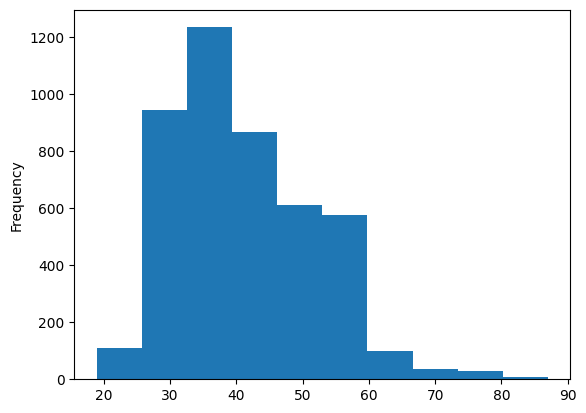

In [10]:
df['age'].plot(kind='hist')

In [11]:
#This line create histogram of singal variable age

In [12]:
df['balance'].describe()

,balance
count,4495.000000
mean,1423.153504
std,3015.932038
min,-3313.000000
25%,69.000000
50%,443.000000
75%,1474.000000
max,71188.000000


<Axes: ylabel='Frequency'>

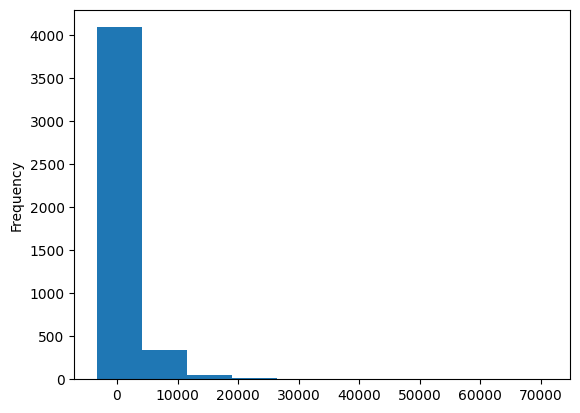

In [14]:
df['balance'].plot(kind= 'hist')

In [16]:
df['job']. value_counts(normalize=True)* 100

,proportion
job,
management,21.433311
blue-collar,20.924574
technician,16.987392
admin.,10.572882
services,9.223623
retired,5.087370
self-employed,4.047777
entrepreneur,3.715992
unemployed,2.831232


<Axes: ylabel='proportion'>

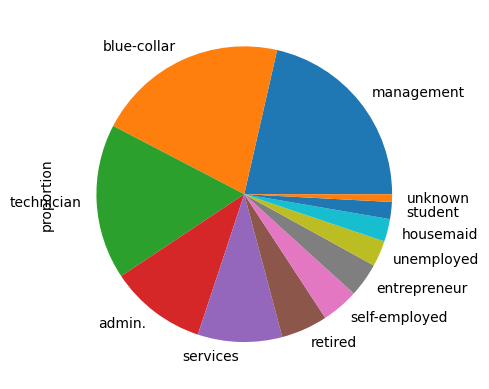

In [19]:
(df['job']. value_counts(normalize=True)* 100).plot(kind='pie')

In [39]:
df.groupby('deposit')['balance'].mean()

,balance
deposit,
no,1403.671023
yes,1573.387597


<Axes: xlabel='deposit'>

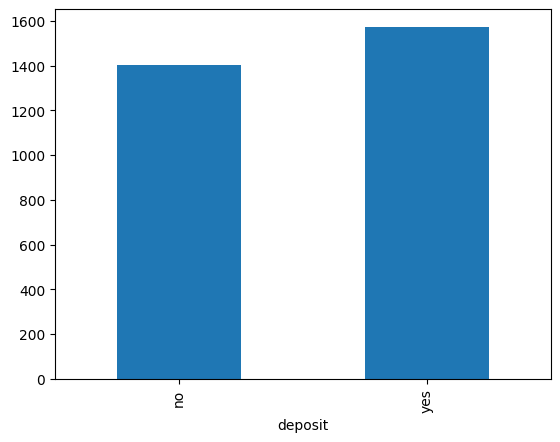

In [40]:
df.groupby('deposit')['balance'].mean().plot(kind="bar")

In [43]:
pd.crosstab(df['education'],df['deposit'])

deposit,no,yes
education,,
primary,614,64
secondary,2061,245
tertiary,1157,193
unknown,168,19


In [44]:
pd.crosstab(df['education'],df['deposit'],normalize='index')*100

deposit,no,yes
education,,
primary,90.560472,9.439528
secondary,89.375542,10.624458
tertiary,85.703704,14.296296
unknown,89.839572,10.160428


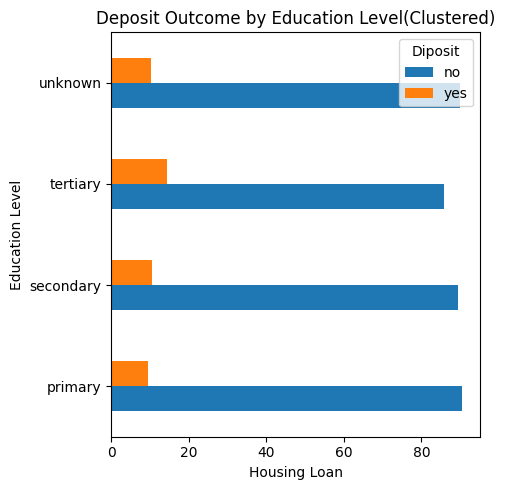

In [63]:
(pd.crosstab(df['education'],df['deposit'],normalize='index')*100).plot(kind='barh', figsize =(5,5))
plt.title('Deposit Outcome by Education Level(Clustered)')
plt.xlabel('Housing Loan')
plt.ylabel('Education Level')
plt.xticks(rotation=0)
plt.legend(title='Diposit')
plt.tight_layout()
plt.show()

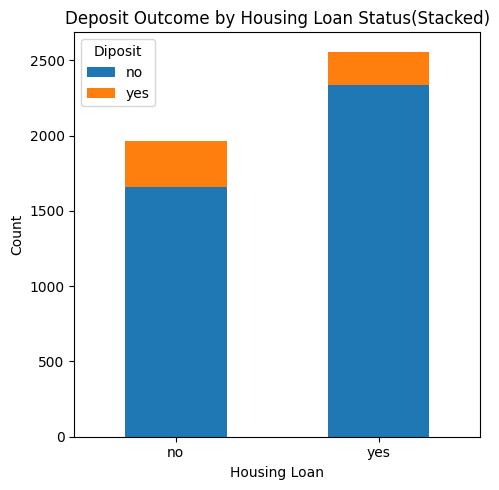

In [55]:
housing_deposit_crosstab = pd.crosstab(df['housing'],df['deposit'])
housing_deposit_crosstab.plot(kind='bar', stacked=True, figsize=(5,5))
plt.title('Deposit Outcome by Housing Loan Status(Stacked)')
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Diposit')
plt.tight_layout()
plt.show()

<Axes: xlabel='poutcome'>

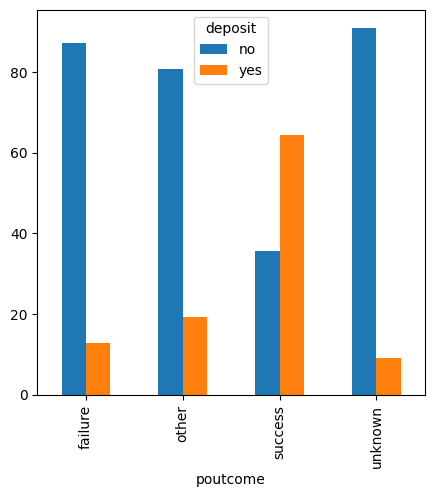

In [62]:
(pd.crosstab(df['poutcome'],df['deposit'],normalize='index')*100).plot(kind='bar',figsize=(5,5))

In [66]:
df.groupby('deposit')['campaign'].mean()

,campaign
deposit,
no,2.873379
yes,2.275049


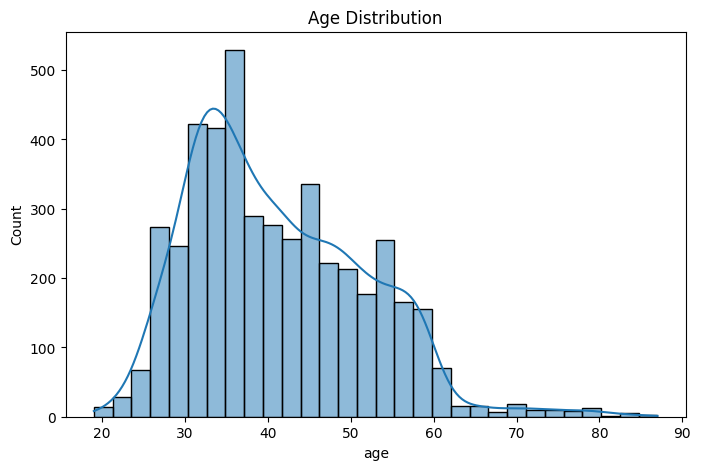

In [69]:
#Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'],bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

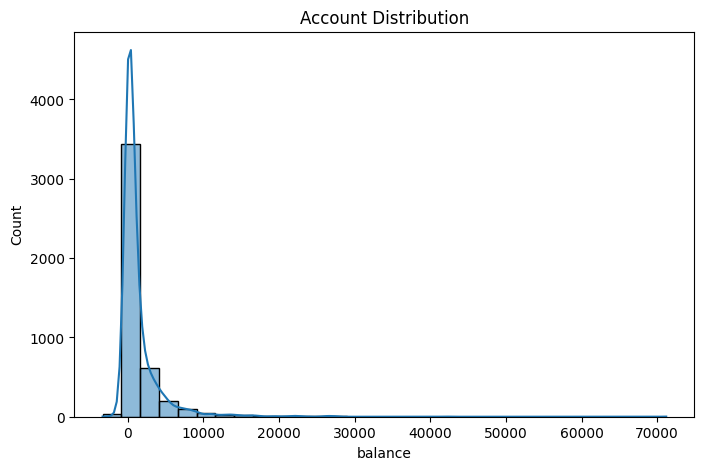

In [70]:
#Balance Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['balance'],bins=30, kde=True)
plt.title("Account Distribution")
plt.show()

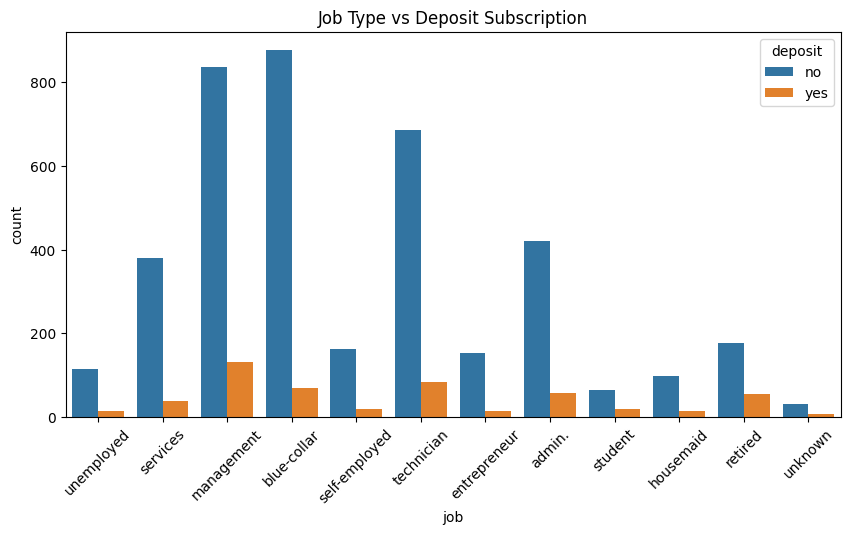

In [72]:
# Job Category vs Deposit Subsceiption
plt.figure(figsize=(10,5))
sns.countplot(data=df, x= 'job' ,hue='deposit')
plt.xticks(rotation=45)
plt.title("Job Type vs Deposit Subscription")
plt.show()

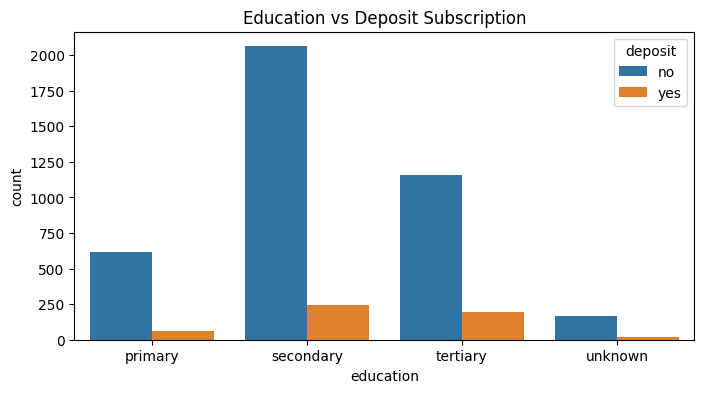

In [76]:
# Education Level vs Deposit Subscription
plt.figure(figsize=(8,4))
sns.countplot(data=df, x= 'education' ,hue='deposit')
plt.title("Education vs Deposit Subscription")
plt.show()

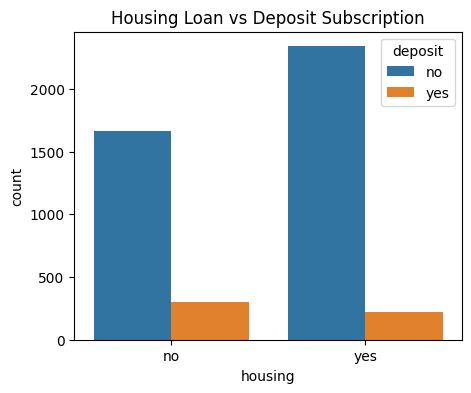

In [77]:
#Housing Loan Impaact
plt.figure(figsize=(5,4))
sns.countplot(data=df, x= 'housing' ,hue='deposit')
plt.title("Housing Loan vs Deposit Subscription")
plt.show()

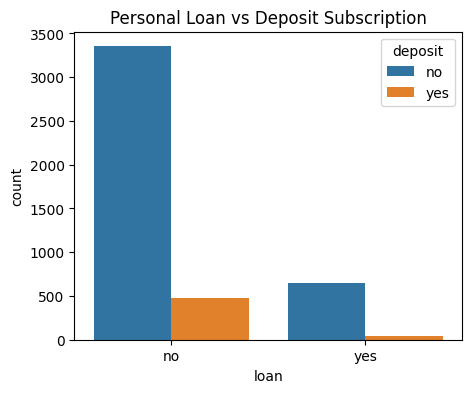

In [78]:
# Loan Staus Imapct
plt.figure(figsize=(5,4))
sns.countplot(data=df, x= 'loan' ,hue='deposit')
plt.title("Personal Loan vs Deposit Subscription")
plt.show()

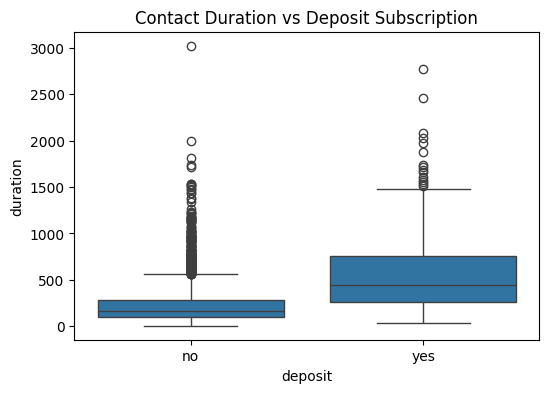

In [82]:
# Contact Duration vs Deposit
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x= 'deposit' ,y='duration')
plt.title("Contact Duration vs Deposit Subscription")
plt.show()

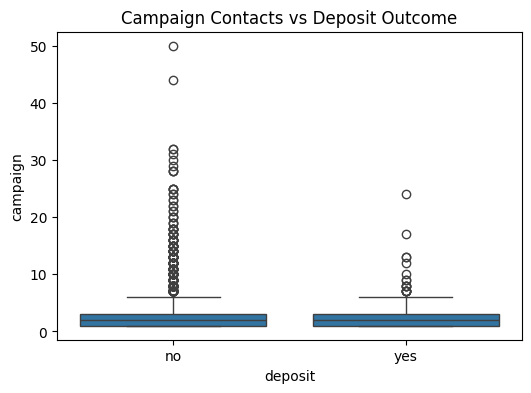

In [83]:
# Campaign frequency vs Deposit
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x= 'deposit' ,y='campaign')
plt.title("Campaign Contacts vs Deposit Outcome")
plt.show()

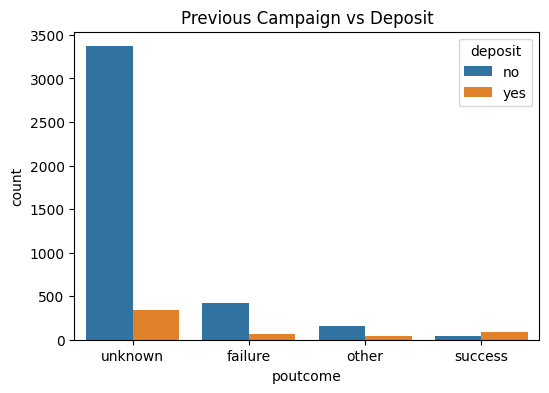

In [84]:
# Previous Campaign Outcome Impact
plt.figure(figsize=(6,4))
sns.countplot(data=df, x= 'poutcome' ,hue='deposit')
plt.title("Previous Campaign vs Deposit")
plt.show()

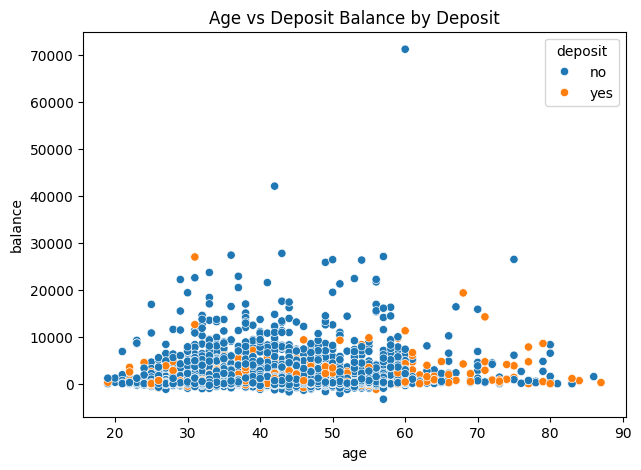

In [85]:
# Balance vs Age Relationship
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x= 'age' ,y='balance' ,hue='deposit')
plt.title("Age vs Deposit Balance by Deposit")
plt.show()